# <center> WISCONSIN BREAST CANCER DATASET 

**Table of contents**
***

1. Introduction. 
2. Objectives. 
3. Preparation of the dataset.
4. Descriptive analysis. 
5. Data preprocessing.
6. Classifiers analysis. 
7. Classifiers performance comparison. 
8. Resampling techniques. 
9. Discussion.
10.References. 

**Python libraries**
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset
from sdv.tabular import GaussianCopula
from sdv.evaluation import evaluate

## 1. INTRODUCTION: The Wisconsin breast cancer dataset.
***

The Wisconsin breast cancer dataset is a classification dataset, which records the measurements for breast cancer cases. Particularly, the measurement of different features from the cell nucleus.(1,2)

These features are computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.(1,2)

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension.(1,2)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.(1,2)

Finally, the features are divided in two classes, benign (B) and malignant (M). In total, the dataset holds 569 samples, 357 benign and 212 malignant.(1,2)

## 2. OBJECTIVES.
***

1. Undertake an analysis/review of the dataset and present an overview and background.  
2. Provide a literature review on classifiers which have been applied to the dataset and compare their performance.  
3. Present a statistical analysis of the dataset  
4. Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers. 
5. Compare, contrast and critique your results with reference to the literature  
6. Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints.  

## 3. PREPARATION OF THE DATASET.
***

In this section, we are going to get the dataset ready for the statistical and classifiers analysis.

**Reading the dataset**

In [2]:
# pd.read_csv from pandas to read the dataset.(3)
dt = pd.read_csv("data2.csv")

In [3]:
# shape() returns a tuple representing the dimensionality of the DataFrame.(4)
dt.shape

(569, 33)

Our dataset has: 

569 rows  
33 columns

Let´s have a look to the columns:

In [4]:
# columns function returns the column labels of the DataFrame.(5)
dt.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

We have two columns which we are not going to need: 
1. "id"
2. "Unnamed: 32"

**Removing unnecessary columns**

In [168]:
# Removing "id" and "unnamed: 32" columns which are not necessary for our model using drop function.(6)
ds = dt.drop(['id','Unnamed: 32'],axis = 1)
ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now we have the necessary columns for our model so let´s have a look to our dataframe.

In [6]:
# The info() method prints information about the DataFrame.(7)
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

We can see that the diagnosis feature is an object data type. In order to manipulate the dataset easily in future operations we are going to convert it into an integer.

**Replacing B/M for 1/0**

In [7]:
# First we need to replace the "B" or "M" values for the numerical respectives "0" or "1" using replace().(8)
ds["diagnosis"] = ds["diagnosis"].replace(["M"], ["1"])
ds["diagnosis"] = ds["diagnosis"].replace(["B"], ["0"])

In [8]:
# Let's check that the replacement was done correctly using "np.unique".(9)
np.unique(ds["diagnosis"], return_counts=True)

(array(['0', '1'], dtype=object), array([357, 212], dtype=int64))

The replacement was done correctly. 

In [9]:
# Now we need to convert the data type from object to integer.(10)
pd.to_numeric(ds["diagnosis"])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

We have now our dataset ready for the statistical and classifiers analysis.

## 4. DESCRIPTIVE ANALYSIS.
***

In [161]:
# "pd.DataFrame.describe" to generate descriptive statistics.(11)
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.(11)
pd.DataFrame.describe(ds)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


With "pd.DataFrame.describe" we get a good overview on how the data is dispersed in the dataframe. However, there are too many columns so we are not going to visualize the dataframe using a histogram, since it would be necessary to plot one by one for each feature or it would be difficult to appreciate correlation between variables. Instead, we are going to use the seaborn method "heatmap" (**Figure 1**).

**Heatmap**

The heatmap shows the relation between features. It plot rectangular data as a color-encoded matrix.(12,13)

The numerical value "1" shows the highest correlation between variables, which it is associated to red colour.

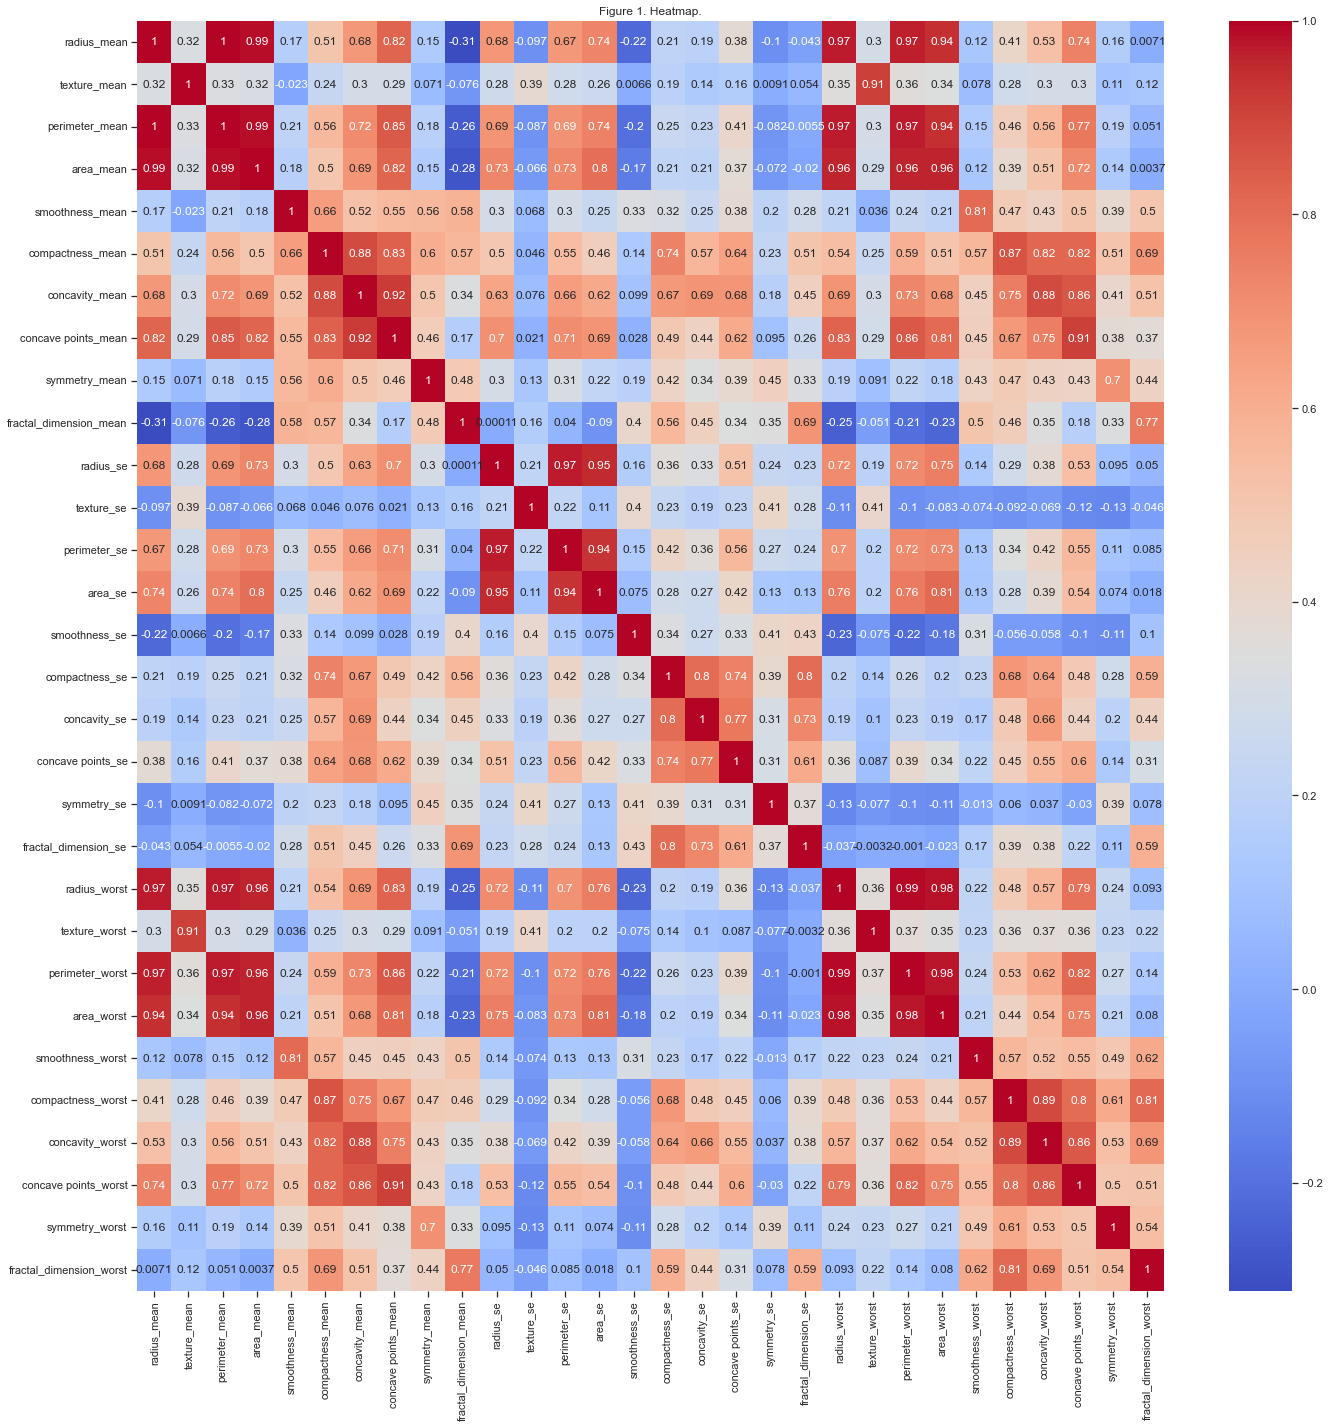

In [11]:
# Figure 1. Heatmap. 
# Finding correlation among features using sns' heatmap.(12)

sns.set(style="ticks")
plt.figure(figsize=(20,20))

# "ds.corr()" to find the pairwise correlation of all columns.(14)
# "annot=true" to write the data value in each cell.(12)
# "cmap='coolwarm" to specify the pattern for the heatmap. 
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm').set(title="Figure 1. Heatmap.")
plt.tight_layout()

From the heatmap we can observe that radius, perimeter, area are highly correlated while other features are less correlated like smoothness, fractal dimension, symmetry and concave points.

# 5. DATA PREPROCESSING
***

**Imbalanced dataset**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.(15)

As we saw in the dataset description, there are more benign samples (357) than malignant samples (212). This is a common problem in machine learning and there are different resampling techniques for dealing with the imbalance.

**Number of bening and malignant samples**

In [13]:
b = ds[ds["diagnosis"] == "0"].shape[0]
m = ds[ds["diagnosis"] == "1"].shape[0]
dif = b-m

print("Bening samples:", b)
print("Malignant samples:", m)
print("Difference of samples:", dif)

Bening samples: 357
Malignant samples: 212
Difference of samples: 145


In [14]:
total = b + m
b_pc = round((b/total)*100,2)
m_pc = round((m/total)*100,2)
print("Proportion of benign samples:", b_pc,"%")
print("Proportion of malignant samples:", m_pc,"%")

Proportion of benign samples: 62.74 %
Proportion of malignant samples: 37.26 %


In our case, we would have a moderate imbalance of the minority class (20-40% of the dataset).(16) Therefore, we will train our dataset with the original data and then compare against the resampling techniques (Undersample, oversample, generate synthetic data).(15) 

**Train the dataset with train_test_split**

In this step, we are going to get ready our dataset to use it with the classifiers. 

In [15]:
# Train the dataset with train_test_split:

# Inputs:
x = ds.drop(['diagnosis'], axis = 1)
# Outcomes: 
y = ds['diagnosis']

# The test_size parameter enables you to specify the size of the output test set.(16,17)
# The random_state parameter controls how the pseudo-random number generator randomly selects observations to go into the training set or test set.(16,17)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)


It is important to consider that our dataset is imbalanced, when the train_test_split method splits the dataset, the proportion of benign and malignant samples will not be the same in the train and test model, which may affect the performance results.

# 6. CLASSIFIERS ANALYSIS
***

**Classifiers applied to the dataset in the literature**

The Wisconsin breast cancer dataset has been widely used in machine learning, plenty of classifiers have been investigated and their performances assessed. For the purpose of this project, I will focus on the classifiers used with more frequency:     

1. K Nearest Neighbors classifier.   
2. Logistic regression.  
3. Linear support vector classifier.   
4. Decision tree classifier.   
5. Random forest.  
6. Neural networks.  
7. Naive bayes.(18-22)

**Metrics to measure classification performance**

In order to evaluate the performance of the models there are several metrics we can use. 

1. Accuracy: number of correct predictions divided by the total number of predictions. An accuracy score will give a value between 0 and 1, a value of 1 would indicate a perfect model.(23)

2. Recall: measures how good the model is at correctly predicting all the positive observations in the dataset.(23)

3. Precision: measures how good the model is at correctly identifying the positive class.(23)

4. f1 (harmonic mean of precision and recall). The F1 score will give a number between 0 and 1. If the F1 score is 1.0 this indicates perfect precision and recall. If the F1 score is 0 this means that either the precision or the recall is 0.(23)

5. Matthews correlation coefficient (MCC): correlation coefficient between the observed and predicted classifications. As with any correlation coefficient, its value will lie between -1.0 and +1.0. A value of +1 would indicate a perfect model.(23)

6. Confusion Matrix: compares the number of predictions for each class that are correct and those that are incorrect.(23)

    In a confusion matrix, there are 4 numbers to pay attention to.  

    True positives: The number of positive observations the model correctly predicted as positive.  

    False-positive: The number of negative observations the model incorrectly predicted as positive.  

    True negative: The number of negative observations the model correctly predicted as negative.  

    False-negative: The number of positive observations the model incorrectly predicted as negative.(23)

7. ROC (Receiver Operating Characteristics) curve: plot of the performance of the model (a plot of the true positive rate and the false positive rate) at all classification thresholds. The area under the curve (AUC) is the measurement of the entire two-dimensional area under the curve and as such is a measure of the performance of the model at all possible classification thresholds. ROC curves plot the accuracy of the model and therefore are best suited to diagnose the performance of models where the data is not imbalanced. (23)

8. Kappa: measures how the model is performing compared to a model that classifies observations at random according to the frequency of each class.(23)

**NOTE.** For better visualization all metrics are expressed in percentage (%)

**NOTE.** ROC and kappa have not been evaluated since I kept getting errors during the calculation which I was not able to fix before deadline. 

## **6.1. K NEAREST NEIGHBORS CLASSIFIER**

Text(0.5, 1.0, 'Figure 2. K Neighbors Classifier scores for different K values')

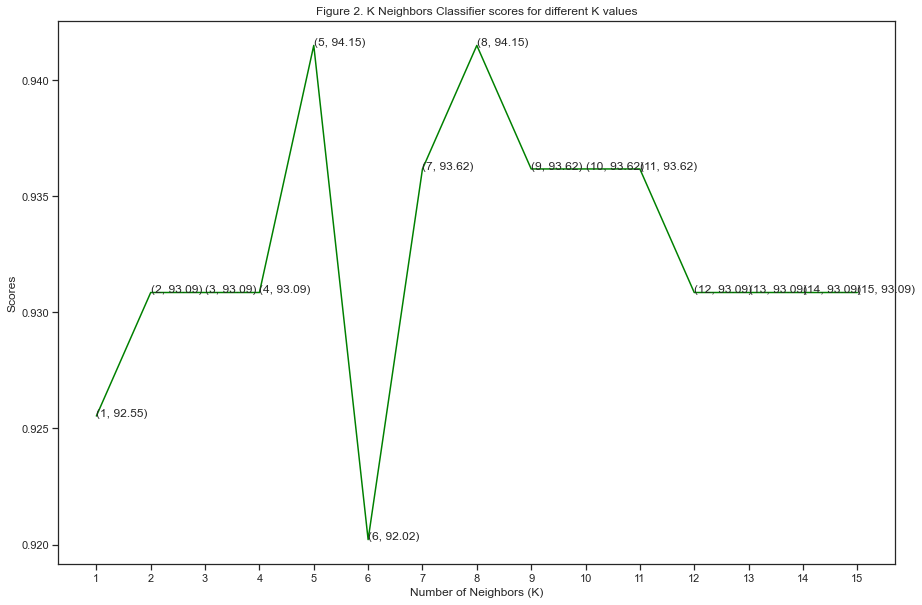

In [16]:
# First, we are going to calculare what would be the best number of neighbors to use.(24)

# List to fit the values:
knn_values = []

# We calculate the accuracy score for each number of neighbors (from 1 to 16):
for i in range (1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit and predict results using our test dataset. 
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)    
    # "accuracy_score" to calculate the accuracy(27)
    a = accuracy_score(pred,y_test)
    knn_values.append(a)

# Now we are going to plot the results for each value:

# For adding ticks to the axes (25):
sns.set(style="ticks")

plt.figure(figsize=(15,10))

# We plot the accuracy values in the range of the neighbors values from 1 to 16.
plt.plot([k for k in range(1, 16)], knn_values, color = 'green')

for i in range(1,16):
    # To add the text to the Axes at location x, y in data coordinates.(26)
    plt.text(i, knn_values[i-1], (i, round(knn_values[i-1]*100,2)))

plt.xticks([i for i in range(1, 16)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.grid(False)
plt.title('Figure 2. K Neighbors Classifier scores for different K values')

**K Nearest neighbors classifier: metrics**

When I run the code the best value for n_neighbors was 5 and 8 with 94.15% accuracy. This could change due to the train_test_split method if the code is run again (**Figure 2**).

In [17]:
# Knn accuracy (27)

# n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
knn_acc = round((accuracy_score(pred,y_test))*100,2)
print("KNN accuracy:", knn_acc)
print()

# Knn recall(28)

# "None" to return the scores for each class.
knn_rec = np.round(recall_score(y_test, pred, average=None)*100,2)
print("KNN recall:", knn_rec)
print()

# Knn precision (29)

# "None" to return the scores for each class.
knn_prec = np.round(precision_score(y_test, pred, average=None)*100,2)
print("KNN precision:", knn_prec)
print()

# Knn f1 (30)

# "None" to return the scores for each class.
knn_f1 = np.round(f1_score(y_test, pred, average=None)*100,2)
print("KNN f1:", knn_f1)
print()

# knn Matthews correlation coefficient (MCC)(31)

knn_mcc = (round(matthews_corrcoef(y_test,pred),2))*100
print("KNN Matthews correlation coefficient:", knn_mcc)

KNN accuracy: 94.15

KNN recall: [95.97 90.62]

KNN precision: [95.2  92.06]

KNN f1: [95.58 91.34]

KNN Matthews correlation coefficient: 87.0


In [18]:
# Knn classification report (32)

# View the classification report for test data and predictions
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.92      0.91      0.91        64

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



Figure 3. KNN Confusion Matrix


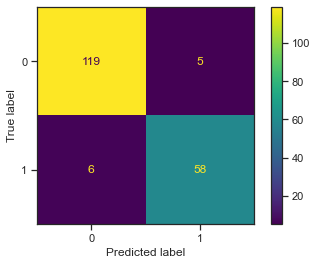

In [60]:
# Knn - Confusion Matrix visualization.(33)
print("Figure 3. KNN Confusion Matrix")
knn_cm = confusion_matrix(y_test, pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 119 benign samples but incorrectly predicted 5 as malignant.

The model correctly predicted 58 malignant observations but incorrectly predicted 6 as benign.

We can see from this confusion matrix that the data sample is imbalanced, with the benign class having a higher volume of observations.

## **6.2. LOGISTIC REGRESION (LR)**

In [20]:
# First, we import the model and fit as we did before (34)

logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(x_train, y_train)
pred_lr = logisticRegr.predict(x_test)

# Logistic regression accuracy:

lr_acc = round((logisticRegr.score(x_test, y_test))*100,2) 
print("Logistic regresion model accuracy:", lr_acc)
print()

# Logistic regression recall:

lr_rec = np.round((recall_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model recall:", lr_rec)
print()

# Logistic regression precision:

lr_prec = np.round((precision_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model precision:", lr_prec)
print()

# Logistic regression f1:

lr_f1 = np.round((f1_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model f1:", lr_f1)
print()

# Logistic regression Matthews correlation coefficient (MCC)

lr_mcc = (round(matthews_corrcoef(y_test,pred_lr),2))*100
print("Logistic regresion model MCC:", lr_mcc)
print()

Logistic regresion model accuracy: 95.21

Logistic regresion model recall: [94.35 96.88]

Logistic regresion model precision: [98.32 89.86]

Logistic regresion model f1: [96.3  93.23]

Logistic regresion model MCC: 90.0



In [21]:
# Logistic regression classification report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       124
           1       0.90      0.97      0.93        64

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



Figure 4. LR Confusion Matrix


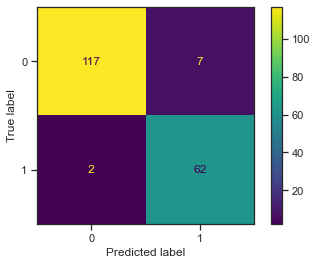

In [61]:
# Logistic regression - Confusion Matrix visualization.
print("Figure 4. LR Confusion Matrix")
lr_cm = confusion_matrix(y_test, pred_lr, labels=logisticRegr.classes_)
lrdisp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=logisticRegr.classes_)
lrdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 117 benign samples but incorrectly predicted 7 as malignant.

The model correctly predicted 62 malignant observations but incorrectly predicted 2 as benign.

Same as the KNN model, we can see from this confusion matrix that the data sample is imbalanced, with the benign class having a higher volume of observations.

## **6.3. SUPPORT VECTOR CLASSIFIER (SVC)**

**SVC metrics**

In [23]:
from sklearn import svm# Chooses the support vector machine algorithm for our classifier.(35,36)

clf = svm.SVC(kernel = "linear")# Training the classifier
clf_trained = clf.fit(x_train,y_train)# Scoring the classifier
clf_pred = clf_trained.predict(x_test)

# Support Vector Classifier accuracy

svc_acc = round(clf_trained.score(x_train,y_train)*100,2)
print("SVC accuracy:", svc_acc)
print()

# Support Vector Classifier precision

svc_prec = np.round((precision_score(y_test, clf_pred, average=None))*100,2)
print("SVC precision:", svc_prec)
print()

# Support Vector Classifier recall

svc_rec = np.round(recall_score(y_test, clf_pred, average=None)*100,2)
print("SVC recall:", svc_rec)
print()

# Support Vector Classifier f1

svc_f1 = np.round(f1_score(y_test, clf_pred, average=None)*100,2)
print("SVC f1:", svc_f1)
print()

# Support Vector Classifier - Matthews correlation coefficient (MCC)

svc_mcc = (round(matthews_corrcoef(y_test,clf_pred),2))*100
print("SVC MCC:", svc_mcc)

SVC accuracy: 96.33

SVC precision: [97.5  89.71]

SVC recall: [94.35 95.31]

SVC f1: [95.9  92.42]

SVC MCC: 88.0


In [24]:
#  Support Vector Classifier classification report:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       124
           1       0.90      0.95      0.92        64

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



Figure 5. SVC Confusion Matrix


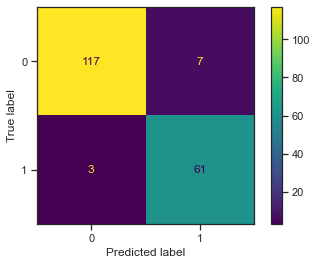

In [62]:
# Support Vector Classifier - Confusion Matrix visualization.
print("Figure 5. SVC Confusion Matrix")
svc_cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)

svcdisp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=clf.classes_)

svcdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 117 benign samples but incorrectly predicted 7 as malignant.

The model correctly predicted 61 malignant observations but incorrectly predicted 3 as benign.

Similar results as observed with the LR model.

## **6.4. DECISION TREE CLASSIFIER (DTC)**

In [26]:
from sklearn.tree import DecisionTreeClassifier #(37)

clf_en = DecisionTreeClassifier()
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

# Decision tree classifier accuracy

dtc_acc = round(accuracy_score(y_test, y_pred_en)*100,2)
print("Decision tree classifier accuracy:", dtc_acc)
print()

# Decision tree classifier precision

dtc_prec = np.round((precision_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier precision:", dtc_prec)
print()

# Decision tree classifier recall

dtc_rec = np.round((recall_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier recall:",dtc_rec)
print()

# Decision tree classifier f1

dtc_f1 = np.round((f1_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier f1:", dtc_f1)
print()

# Decision tree classifier - Matthews correlation coefficient (MCC)

dtc_mcc = (round(matthews_corrcoef(y_test, y_pred_en),2))*100
print("Decision tree classifier MCC:", dtc_mcc)

Decision tree classifier accuracy: 93.09

Decision tree classifier precision: [95.87 88.06]

Decision tree classifier recall: [93.55 92.19]

Decision tree classifier f1: [94.69 90.08]

Decision tree classifier MCC: 85.0


In [27]:
# Decision tree classifier - classification report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       124
           1       0.88      0.92      0.90        64

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188



Figure 6. DTC Confusion Matrix


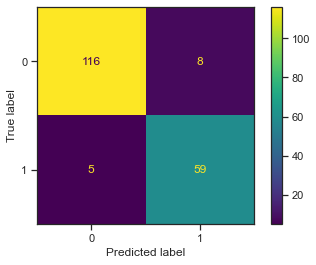

In [63]:
# Decision tree classifier - Confusion Matrix visualization.
print("Figure 6. DTC Confusion Matrix")
dtc_cm = confusion_matrix(y_test, y_pred_en, labels=clf_en.classes_)
dtcdisp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=clf_en.classes_)
dtcdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 116 benign samples but incorrectly predicted 8 as malignant.

The model correctly predicted 59 malignant observations but incorrectly predicted 5 as benign.

Still, very similar results as observed with the other models.

## **6.5. RANDOM FOREST (RF)**

In [29]:
from sklearn.ensemble import RandomForestClassifier #(38)

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred_test = forest.predict(x_test)

# Random forest accuracy

rf_acc = round((accuracy_score(y_test, y_pred_test))*100,2)
print("Random forest accuracy:", rf_acc)
print()

# Random forest precision

rf_prec = np.round((precision_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest precision:", rf_prec)
print()

# Random forest recall

rf_rec = np.round((recall_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest recall:", rf_rec)
print()

# Random forest f1

rf_f1 = np.round((f1_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest f1:", rf_f1)
print()

# Random forest - Matthews correlation coefficient (MCC)

rf_mcc = np.round((round(matthews_corrcoef(y_test, y_pred_test),2))*100,2)
print("Random forest MCC:", rf_mcc)

Random forest accuracy: 98.4

Random forest precision: [100.    95.52]

Random forest recall: [ 97.58 100.  ]

Random forest f1: [98.78 97.71]

Random forest MCC: 97.0


In [30]:
# Random forest classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.96      1.00      0.98        64

    accuracy                           0.98       188
   macro avg       0.98      0.99      0.98       188
weighted avg       0.98      0.98      0.98       188



Figure 7. RF Confusion Matrix


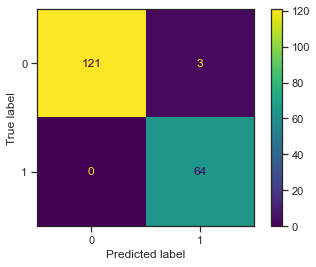

In [64]:
# Random forest - Confusion Matrix visualization.
print("Figure 7. RF Confusion Matrix")
rf_cm = confusion_matrix(y_test, y_pred_test, labels=forest.classes_)
rfdisp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=forest.classes_)
rfdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 121 benign samples but incorrectly predicted 3 as malignant.

The model correctly predicted 64 malignant observations but it did not incorrectly predicted samples as benign.

So far, the best performance.

## **6.6. NEURAL NETWORKS (NNET)**

In [32]:
from sklearn.neural_network import MLPClassifier #(39)
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(x_train,y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

# NNET accuracy

nn_acc = round((accuracy_score(y_test, predict_test))*100,2)
print("NNET accuracy:", nn_acc)
print()

# NNET precision

nn_prec = np.round((precision_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:", nn_prec)
print()

# NNET recall

nn_rec = np.round((recall_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:", nn_rec)
print()

# NNET f1

nn_f1 = np.round((f1_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:",nn_f1)
print()

# NNET - Matthews correlation coefficient (MCC)

nn_mcc = (round(matthews_corrcoef(y_train,predict_train),2))*100
print("NNET precision:", nn_mcc)

NNET accuracy: 93.62

NNET precision: [95.16 90.62]

NNET precision: [95.16 90.62]

NNET precision: [95.16 90.62]

NNET precision: 89.0


In [33]:
# NNET classification report
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       233
           1       0.95      0.92      0.93       148

    accuracy                           0.95       381
   macro avg       0.95      0.94      0.95       381
weighted avg       0.95      0.95      0.95       381



Figure 8. NNET Confusion Matrix


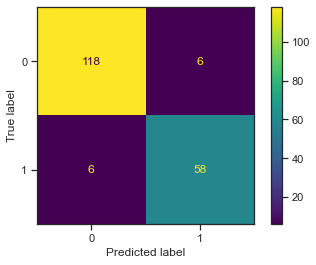

In [65]:
# NNET - Confusion Matrix visualization.
print("Figure 8. NNET Confusion Matrix")
nn_cm = confusion_matrix(y_test, predict_test, labels=mlp.classes_)
nndisp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=mlp.classes_)
nndisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 118 benign samples but incorrectly predicted 6 as malignant.

The model correctly predicted 58 malignant observations but incorrectly predicted 6 as benign.

## **6.7. NAIVE BAYES (NB)**

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_nbpred = gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

# Naive Bayes accuracy

nb_acc = round((accuracy_score(y_test,gnb_pred))*100,2)
print("Naive bayes accuracy:", nb_acc)
print()

# Naive Bayes precision

nb_prec = np.round((precision_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes precision:", nb_prec)
print()

# Naive Bayes recall

nb_rec = np.round((recall_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes recall:", nb_rec)
print()

# Naive Bayes f1

nb_f1 = np.round((f1_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes f1:", nb_f1)
print()

# Naive Bayes- Matthews correlation coefficient (MCC)

nb_mcc = (round(matthews_corrcoef(y_test, gnb_pred),2))*100
print("Naive bayes MCC:", nb_mcc)

Naive bayes accuracy: 95.74

Naive bayes precision: [96.77 93.75]

Naive bayes recall: [96.77 93.75]

Naive bayes f1: [96.77 93.75]

Naive bayes MCC: 91.0


Figure 9. NB Confusion Matrix


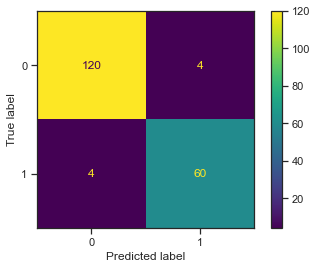

In [66]:
# Naive Bayes - Confusion Matrix visualization.
print("Figure 9. NB Confusion Matrix")
nb_cm = confusion_matrix(y_test, gnb_pred, labels=gnb.classes_)
nbdisp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=gnb.classes_)
nbdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 120 benign samples but incorrectly predicted 4 as malignant.

The model correctly predicted 60 malignant observations but incorrectly predicted 4 as benign.

## **7. CLASSIFIERS PERFORMANCE COMPARISON**
***

### 7.1. Accuracy comparison. 

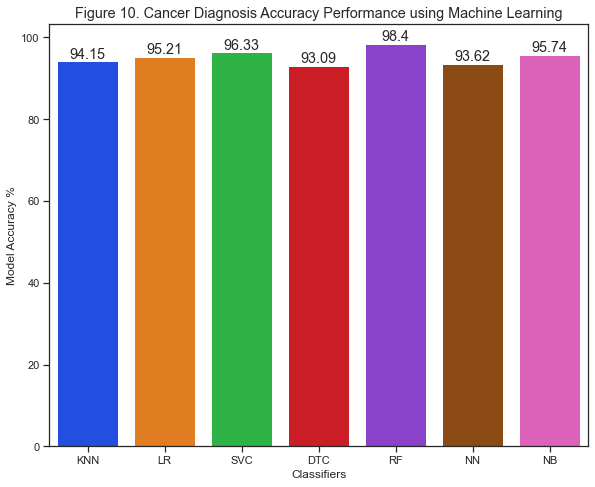

In [67]:
# Visualize model accuracies for comparision - bar will be appropriate to visualize 

acc_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
        "Model Accuracy %":[knn_acc, lr_acc, svc_acc, dtc_acc, rf_acc, nn_acc, nb_acc]
       }
    
accuracydf = pd.DataFrame(data=acc_data)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8.5, 7))

sns.set(font_scale=1.2)

sns.barplot(data=accuracydf, x="Classifiers",y="Model Accuracy %", palette ="bright").set(title="Figure 10. Cancer Diagnosis Accuracy Performance using Machine Learning")

ax.bar_label(ax.containers[0])

plt.tight_layout()

All the classifiers have an accuracy over 93%, however the accuracy of random forest (98.4%) is clearly higher than the other classifiers. 

### **7.2. Matthews correlation coefficient comparison.**

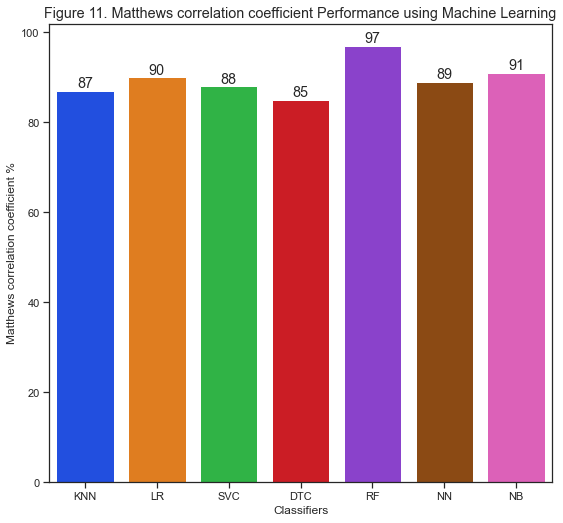

In [68]:
mcc_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Matthews correlation coefficient %":[knn_mcc, lr_mcc, svc_mcc, dtc_mcc, rf_mcc, nn_mcc, nb_mcc]
       }
    
mccdf = pd.DataFrame(data=mcc_data)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8, 7.5))

sns.set(font_scale=1.2)

sns.barplot(data=mccdf, x="Classifiers",y="Matthews correlation coefficient %",palette ="bright").set(title="Figure 11. Matthews correlation coefficient Performance using Machine Learning")

ax.bar_label(ax.containers[0])

plt.tight_layout()

The MCC shows the same result, the random forest classifier is superior than the others.

### 7.3. Precision comparison.

In [46]:
prec_comp = [knn_prec, lr_prec, svc_prec, dtc_prec, rf_prec, nn_prec, nb_prec]

pzero = []
pone = []

for i in prec_comp:
    p0 = i.item(0)
    p1 = i.item(1)
    pzero.append(p0)
    pone.append(p1)

a = np.array(pzero)
b = np.array(pone)

preczero_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Precision B %":a,
            "Precision M %":b
       }

precdf = round(pd.DataFrame(data=preczero_data),2)
precdf

,Classifiers,Precision B %,Precision M %
0,KNN,95.20,92.06
1,LR,98.32,89.86
2,SVC,97.50,89.71
3,DTC,95.87,88.06
4,RF,100.00,95.52
5,NN,95.16,90.62
6,NB,96.77,93.75


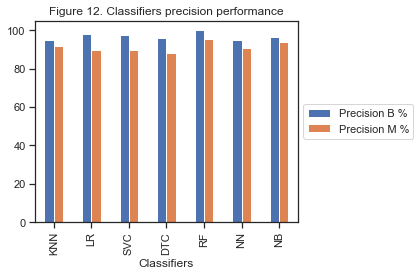

In [69]:
# plotting graph
sns.set(style="ticks")
precdf.plot(x="Classifiers", y=["Precision B %", "Precision M %"], kind="bar")
plt.title("Figure 12. Classifiers precision performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

Precision measures how good the model is at correctly identifying the positive class. Random Forest achieves a 100% precision in identifying the B class and 95.52& with M class.

### 7.4. Recall comparison.

In [47]:
recall_comp = [knn_rec, lr_rec, svc_rec, dtc_rec, rf_rec, nn_rec, nb_rec]

reczero = []
recone = []

for i in recall_comp:
    r0 = i.item(0)
    r1 = i.item(1)
    reczero.append(r0)
    recone.append(r1)

c = np.array(reczero)
d = np.array(recone)

recall_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Recall B %":c,
            "Recall M %":d
       }

recalldf = round(pd.DataFrame(data=recall_data),2)
recalldf

,Classifiers,Recall B %,Recall M %
0,KNN,95.97,90.62
1,LR,94.35,96.88
2,SVC,94.35,95.31
3,DTC,93.55,92.19
4,RF,97.58,100.00
5,NN,95.16,90.62
6,NB,96.77,93.75


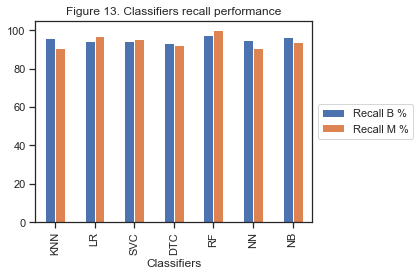

In [70]:
# plotting graph
sns.set(style="ticks")
recalldf.plot(x="Classifiers", y=["Recall B %", "Recall M %"], kind="bar")
plt.title("Figure 13. Classifiers recall performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

Recall measures how good the model is at correctly predicting all the positive observations in the dataset. Random Forest still superior to the other classifiers.

### 7.5. f1 comparison

In [50]:
f1_comp = [knn_f1, lr_f1, svc_f1, dtc_f1, rf_f1, nn_f1, nb_f1]

fzero = []
fone = []

for i in f1_comp:
    f0 = i.item(0)
    f1 = i.item(1)
    fzero.append(f0)
    fone.append(f1)

e = np.array(fzero)
f = np.array(fone)

f1_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "f1 B %":e,
            "f1 M %":f
       }

f1df = np.round(pd.DataFrame(data=f1_data),2)
f1df

,Classifiers,f1 B %,f1 M %
0,KNN,95.58,91.34
1,LR,96.30,93.23
2,SVC,95.90,92.42
3,DTC,94.69,90.08
4,RF,98.78,97.71
5,NN,95.16,90.62
6,NB,96.77,93.75


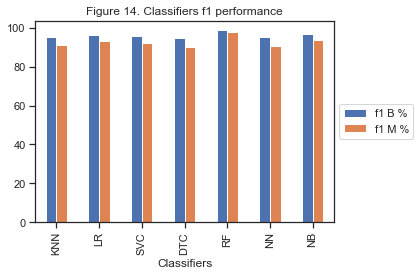

In [71]:
# plotting graph
sns.set(style="ticks")
f1df.plot(x="Classifiers", y=["f1 B %", "f1 M %"], kind="bar")
plt.title("Figure 14. Classifiers f1 performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

If the F1 score is 100 this indicates perfect precision and recall. Random forest is superior to the other models.

**Classifiers comparison result:**

The random forest has shown the best performance in all metrics. The next step in this project is to evaluate the different resampling techniques and how they affect to the random forest classifier. 

# 8. RESAMPLING TECHNIQUES
***

There are three main resampling techniques:

1. Undersampling the majority class.  
2. Resampling the dataset with synthetic data. 
3. Oversampling the minority class. 

## 8.1. UNDERSAMPLING THE MAJORITY CLASS 

Undersampling can be defined as removing some values of the majority class. However, a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.(15)

**Undersampling the benign tumor data**

In [73]:
# "loc" to access all the rows with the diagnosis outcome "bening".(40)

# Benign data:
dsb = ds.loc[ds["diagnosis"] == "0"]
# Malignant data:
dsm = ds.loc[ds["diagnosis"] == "1"]

# We pick randomly using "sample()" 212 bening samples, which it is the same number of malignant samples.(41)
dsb_under = dsb.sample(len(dsm))

# Concatenate bening and malignant samples
df_under = pd.concat([dsb_under, dsm], ignore_index=True)

# Let s check if the number of samples by class is correct:
print(np.unique(df_under["diagnosis"], return_counts=True))

(array(['0', '1'], dtype=object), array([212, 212], dtype=int64))


We have the same number of benign and malignant samples. Let s check if, due to the undersampling, the correlation may have changed. (**Figure 15**)

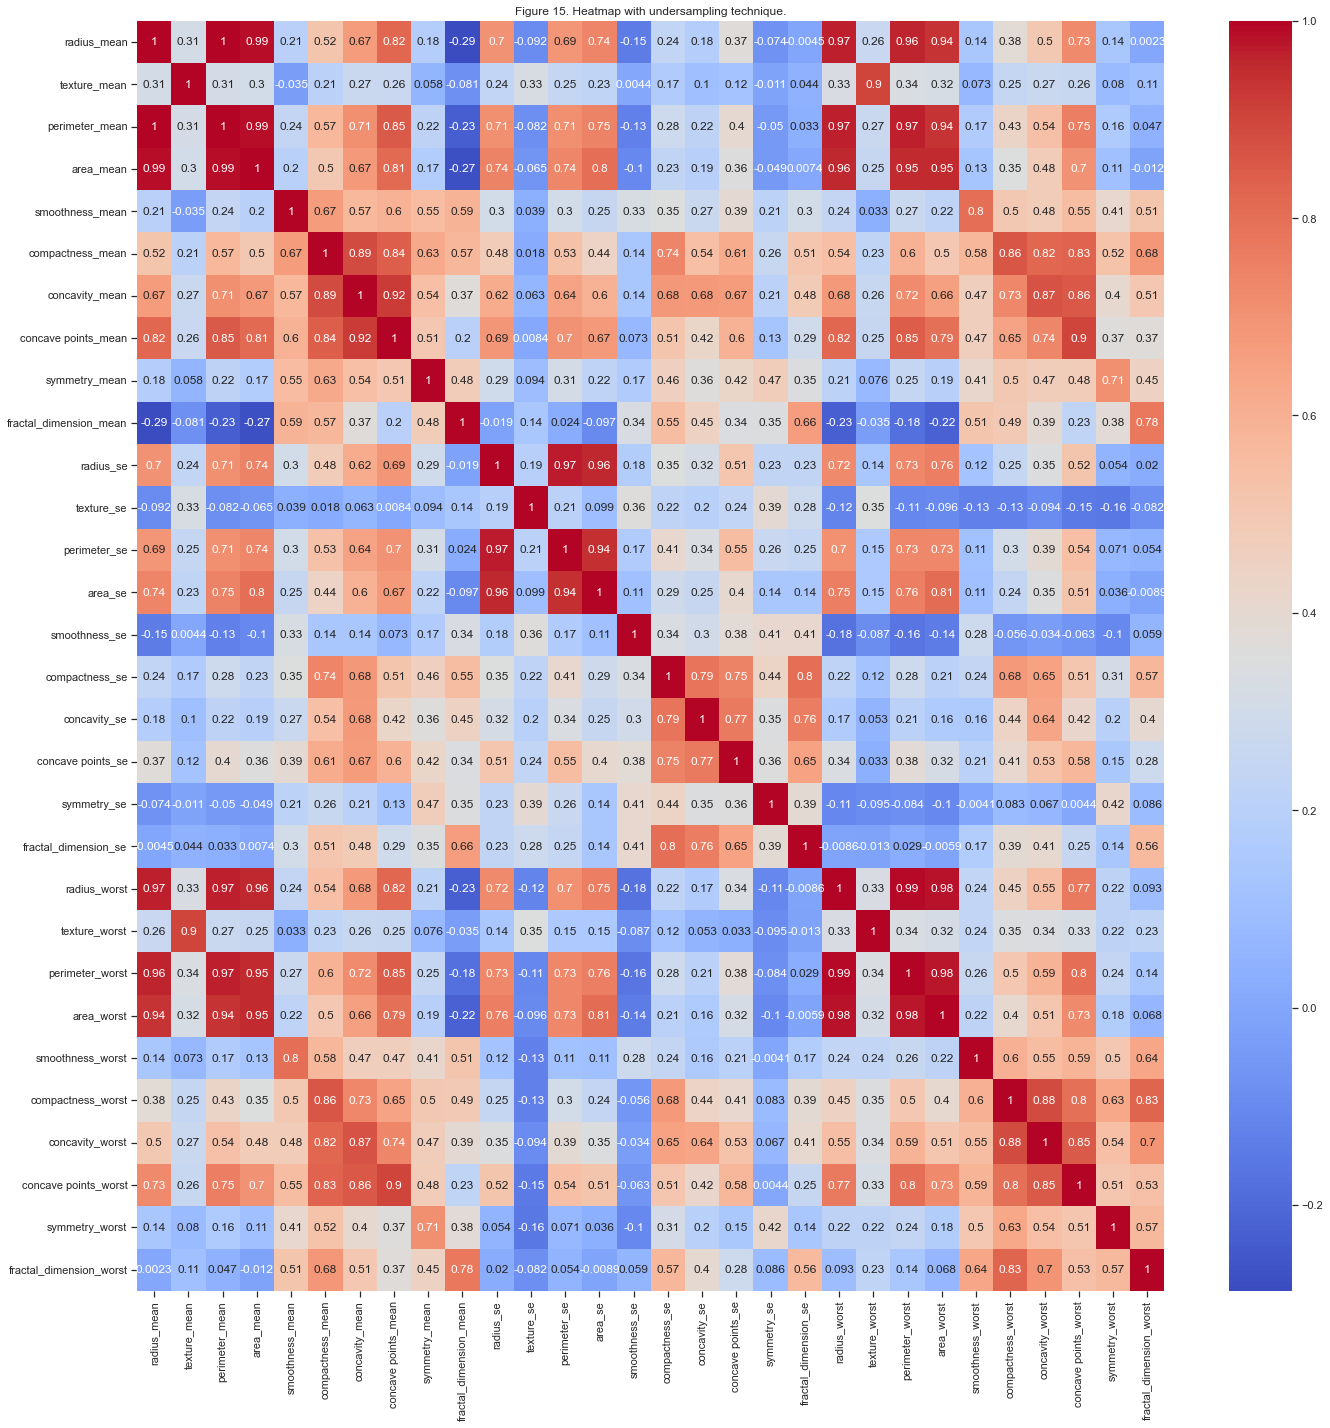

In [77]:
# Finally, let s have a look to the data correlation.
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.heatmap(df_under.corr(),annot=True,cmap='coolwarm').set(title="Figure 15. Heatmap with undersampling technique.")
plt.tight_layout()

The correlation results are quite similar to the original dataset. 

**Train_test_split the undersampled dataset**

In [79]:
# Train the dataset with train_test_split:

# Inputs:
xu = df_under.drop(['diagnosis'], axis = 1)
# Outcomes: 
yu = df_under['diagnosis']

# We are going to keept the same parameters as before
xu_train, xu_test, yu_train, yu_test = train_test_split(xu, yu, test_size = 0.33, random_state = 10)

**Undersampled dataset - Random forest**

In [81]:
forest = RandomForestClassifier()
forest.fit(xu_train, yu_train)
yu_pred_test = forest.predict(xu_test)

# Random forest accuracy

rf_acc_un = round((accuracy_score(yu_test, yu_pred_test))*100,2)
print("Random forest accuracy:", rf_acc_un)
print()

# Random forest precision

rf_prec_un = np.round((precision_score(yu_test, yu_pred_test, average=None))*100,2)
print("Random forest precision:", rf_prec_un)
print()

# Random forest recall

rf_rec_un = np.round((recall_score(yu_test, yu_pred_test, average=None))*100,2)
print("Random forest recall:", rf_rec_un)
print()

# Random forest f1

rf_f1_un = np.round((f1_score(yu_test, yu_pred_test, average=None))*100,2)
print("Random forest f1:", rf_f1_un)
print()

# Random forest - Matthews correlation coefficient (MCC)

rf_mcc_un = np.round((round(matthews_corrcoef(yu_test, yu_pred_test),2))*100,2)
print("Random forest MCC:", rf_mcc)

Random forest accuracy: 97.14

Random forest precision: [98.59 95.65]

Random forest recall: [95.89 98.51]

Random forest f1: [97.22 97.06]

Random forest MCC: 97.0


Figure 16. Undersampled dataset - RF Confusion Matrix


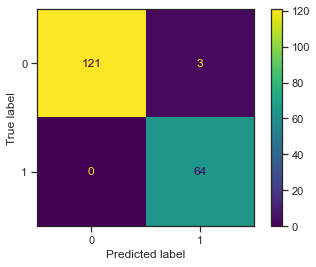

In [82]:
# Random forest - Confusion Matrix visualization.
print("Figure 16. Undersampled dataset - RF Confusion Matrix")
rf_cm_un = confusion_matrix(yu_test, yu_pred_test, labels=forest.classes_)
rfdisp_un = ConfusionMatrixDisplay(confusion_matrix=rf_cm_un, display_labels=forest.classes_)
rfdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 121 benign samples but incorrectly predicted 3 as malignant.

The model correctly predicted 64 malignant observations but it did not incorrectly predicted samples as benign.

Exactly the same performance as the original dataset.

## **8.2. RESAMPLING THE DATASET WITH SYNTHETIC DATA**

Similar to oversampling, this technique creates synthetic samples. Here, we are going to have a look to 2 techniques:

1. SMOTE
2. TORCH

For this project, I will focus on SMOTE as I was not able to make Torch work. 

### 8.2.1 SMOTE

Using imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.(42)

In [93]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

**SMOTE - Generate synthetic data**

In [103]:
# We split the original dataset: 
xsm = ds.drop(['diagnosis'], axis = 1)
ysm = ds['diagnosis']
# Let s check the degree of imbalance:
np.unique(ysm, return_counts=True)

(array(['0', '1'], dtype=object), array([357, 212], dtype=int64))

In [113]:
# transform the dataset (42)
sm = SMOTE(random_state = 2)
oversample = SMOTE()

# "fit_resample" to generate new samples by randomly sampling with replacement the current available samples (43)
xsm, ysm = oversample.fit_resample(xsm, ysm)
xsm_res, ysm_res = sm.fit_resample(xsm, ysm)
np.unique(ysm_res, return_counts=True)

(array(['0', '1'], dtype=object), array([357, 357], dtype=int64))

Now both classes have the same number of samples by class. Let s check if the correlation is affected.(**Figure 17**)

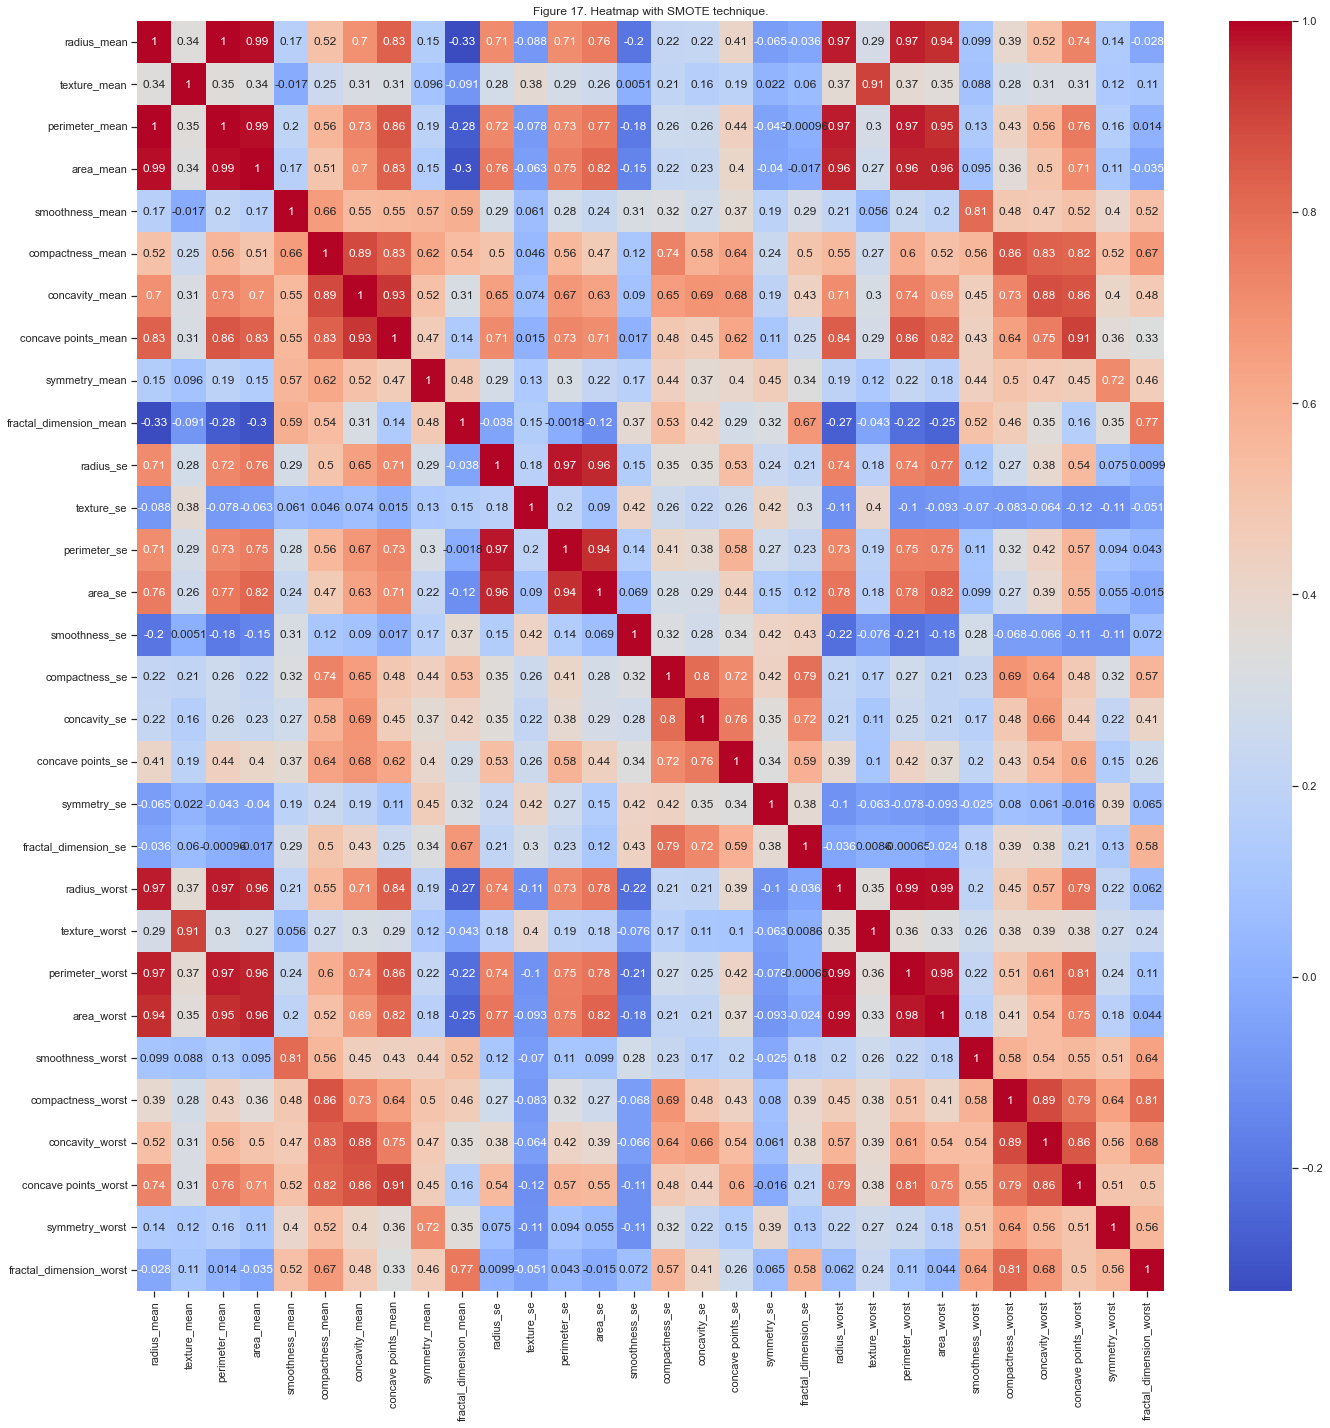

In [114]:
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.heatmap(xsm_res.corr(),annot=True,cmap='coolwarm').set(title="Figure 17. Heatmap with SMOTE technique.")
plt.tight_layout()

Overall, same results as before. 

**SMOTE - Train_test_split**

In [106]:
# Train set split

xsm_train, xsm_test, ysm_train, ysm_test = train_test_split(xsm_res, ysm_res, test_size = 0.33, random_state = 10)

**SMOTE - RANDOM FOREST**

In [108]:
forest = RandomForestClassifier()
forest.fit(xsm_train, ysm_train)
ysm_pred_test = forest.predict(xsm_test)

# Random forest accuracy

rf_acc_sm = round((accuracy_score(ysm_test, ysm_pred_test))*100,2)
print("Random forest accuracy:", rf_acc_sm)
print()

# Random forest precision

rf_prec_sm = np.round((precision_score(ysm_test, ysm_pred_test, average=None))*100,2)
print("Random forest precision:", rf_prec_sm)
print()

# Random forest recall

rf_rec_sm = np.round((recall_score(ysm_test, ysm_pred_test, average=None))*100,2)
print("Random forest recall:", rf_rec_sm)
print()

# Random forest f1

rf_f1_sm = np.round((f1_score(ysm_test, ysm_pred_test, average=None))*100,2)
print("Random forest f1:", rf_f1_sm)
print()

# Random forest - Matthews correlation coefficient (MCC)

rf_mcc_sm = np.round((round(matthews_corrcoef(ysm_test, ysm_pred_test),2))*100,2)
print("Random forest MCC:", rf_mcc_sm)

Random forest accuracy: 98.73

Random forest precision: [100.    97.52]

Random forest recall: [ 97.46 100.  ]

Random forest f1: [98.71 98.74]

Random forest MCC: 97.0


Figure 17. SMOTE - RF Confusion Matrix


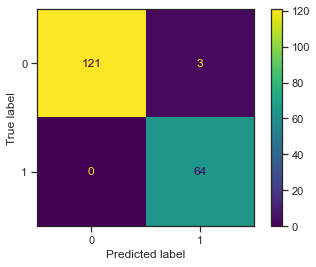

In [112]:
# Random forest - Confusion Matrix visualization.
print("Figure 17. SMOTE - RF Confusion Matrix")
rf_cm_sm = confusion_matrix(ysm_test, ysm_pred_test, labels=forest.classes_)
rfdisp_sm = ConfusionMatrixDisplay(confusion_matrix=rf_cm_sm, display_labels=forest.classes_)
rfdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 121 benign samples but incorrectly predicted 3 as malignant.

The model correctly predicted 64 malignant observations but it did not incorrectly predicted samples as benign.

Exactly the same performance as the original dataset and the undersampling technique. 

**TORCH**

For using TORCH, I followed the steps from the reference. I could not manage to keep going after creating the class.(45,46)

In [131]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset

inputs = ds.drop(['diagnosis'], axis = 1)

outcomes = pd.to_numeric(ds["diagnosis"])

target = torch.tensor(outcomes.values)

features = torch.tensor(inputs.values)

train = TensorDataset(features, target)

train_loader = DataLoader(train, batch_size=100, shuffle=True)

train_features, train_labels = next(iter(train_loader))

class Wisconsin_Dataset(Dataset):
    
    def __init__(self,ds):
        self.ds = ds
    
    def __getitem__(self,idx):
        self.data = torch.from_numpy(self.inputs,axis=1).values
        self.targets = torch.from_numpy(self.outcomes.values)
        return self.data[idx],self.targets[idx].item()
        
    def __len__(self):
        return len(self.targets)

### 8.3. OVERSAMPLING THE MINORITY CLASS. 

Oversampling can be defined as adding more copies of the minority class. One of the python package to generate synthetic data based on the dataset provided is the synthetic data vault.(43)

### 8.3.1 Synthetic Data Vault (SDV)

SDV generates synthetic data by applying mathematical techniques and machine learning models such as the deep learning model.(43)

In [179]:
# Replace the M/B values for 0/1:

ds["diagnosis"] = ds["diagnosis"].replace(["M"], ["1"])
ds["diagnosis"] = ds["diagnosis"].replace(["B"], ["0"])

In [211]:
from sdv.tabular import GaussianCopula 

# For this model we are going to use one of the available Singular Table SDV models, GaussianCopula (43,47)
model = GaussianCopula()

# For this model we are going to use one of the available Singular Table SDV models, GaussianCopula (43,47)
model = GaussianCopula()

# Now we fit the model in our data (43,47)
model.fit(ds)
sample = model.sample(len(ds))

C:\Users\ROB\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
C:\Users\ROB\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


**NOTE.** I got this error due to some values being divided by zero. I was not able to fix it, however, It did not affect the final result. 

**Distribution of samples by class in synthetic dataset**

In [212]:
# Check the number of samples by class in the new model:

svcb = sample[sample["diagnosis"] == '0'].shape[0]
svcm = sample[sample["diagnosis"] == '1'].shape[0]
svc_dif = svcb-svcm

print("Bening samples:", svcb)
print("Malignant samples:", svcm)
print("Difference of samples:", svc_dif)

Bening samples: 370
Malignant samples: 199
Difference of samples: 171


Similar distribution to the original dataset. 

**How good is the generated synthetic data?**

We have to compare the real dataset with the sample dataset in order to evaluate the performance. We have several metrics for this task: 
- Accuracy: the closest to 1 the more similar are both datasets.(46)
- KS complement: compare the continuous columns. Computes the similarity of a real column vs. a synthetic column. Score iqual to 1 means that the real data is exactly the same as the synthetic data.(48)
- CSTest: Same as KS complement but compares the discrete columns.(46)

In [213]:
from sdv.evaluation import evaluate

# Accuracy: 
round(evaluate(sample, ds),2)

0.92

In [214]:
# KS complement and CSTest
evaluate(sample, ds, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.877036,0.877036,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,0.962311,0.962311,0.0,1.0,MAXIMIZE,None


Looking at the three metrics, we can conclude that the synthetic dataset is very similar to the original dataset. 

**Adding the malignant synthetic data to original dataset**

In [218]:
# First, we need to to convert the data type from object to integer.(10)
pd.to_numeric(sample["diagnosis"])

# "loc" to access all the rows with the diagnosis outcome "malignant".(16)
sample_m = sample.loc[sample["diagnosis"] == "1"]

# From "sample_m" we take 145 random samples (dif), which it is the difference between benign and malignant samples in the original dataset.
random_sample_m = sample_m.sample(dif)

# Concatenate the malignant synthetic samples to our original dataset.
new_dt = pd.concat([random_sample_m, dsm, dsb], ignore_index=True)

# Check for quantity of samples by class: 
new_svcb = new_dt[new_dt["diagnosis"] == '0'].shape[0]
new_svcm = new_dt[new_dt["diagnosis"] == '1'].shape[0]
new_svc_dif = new_svcb-new_svcm

print("Bening samples:", new_svcb)
print("Malignant samples:", new_svcm)
print("Difference of samples:", new_svc_dif)

Bening samples: 357
Malignant samples: 357
Difference of samples: 0


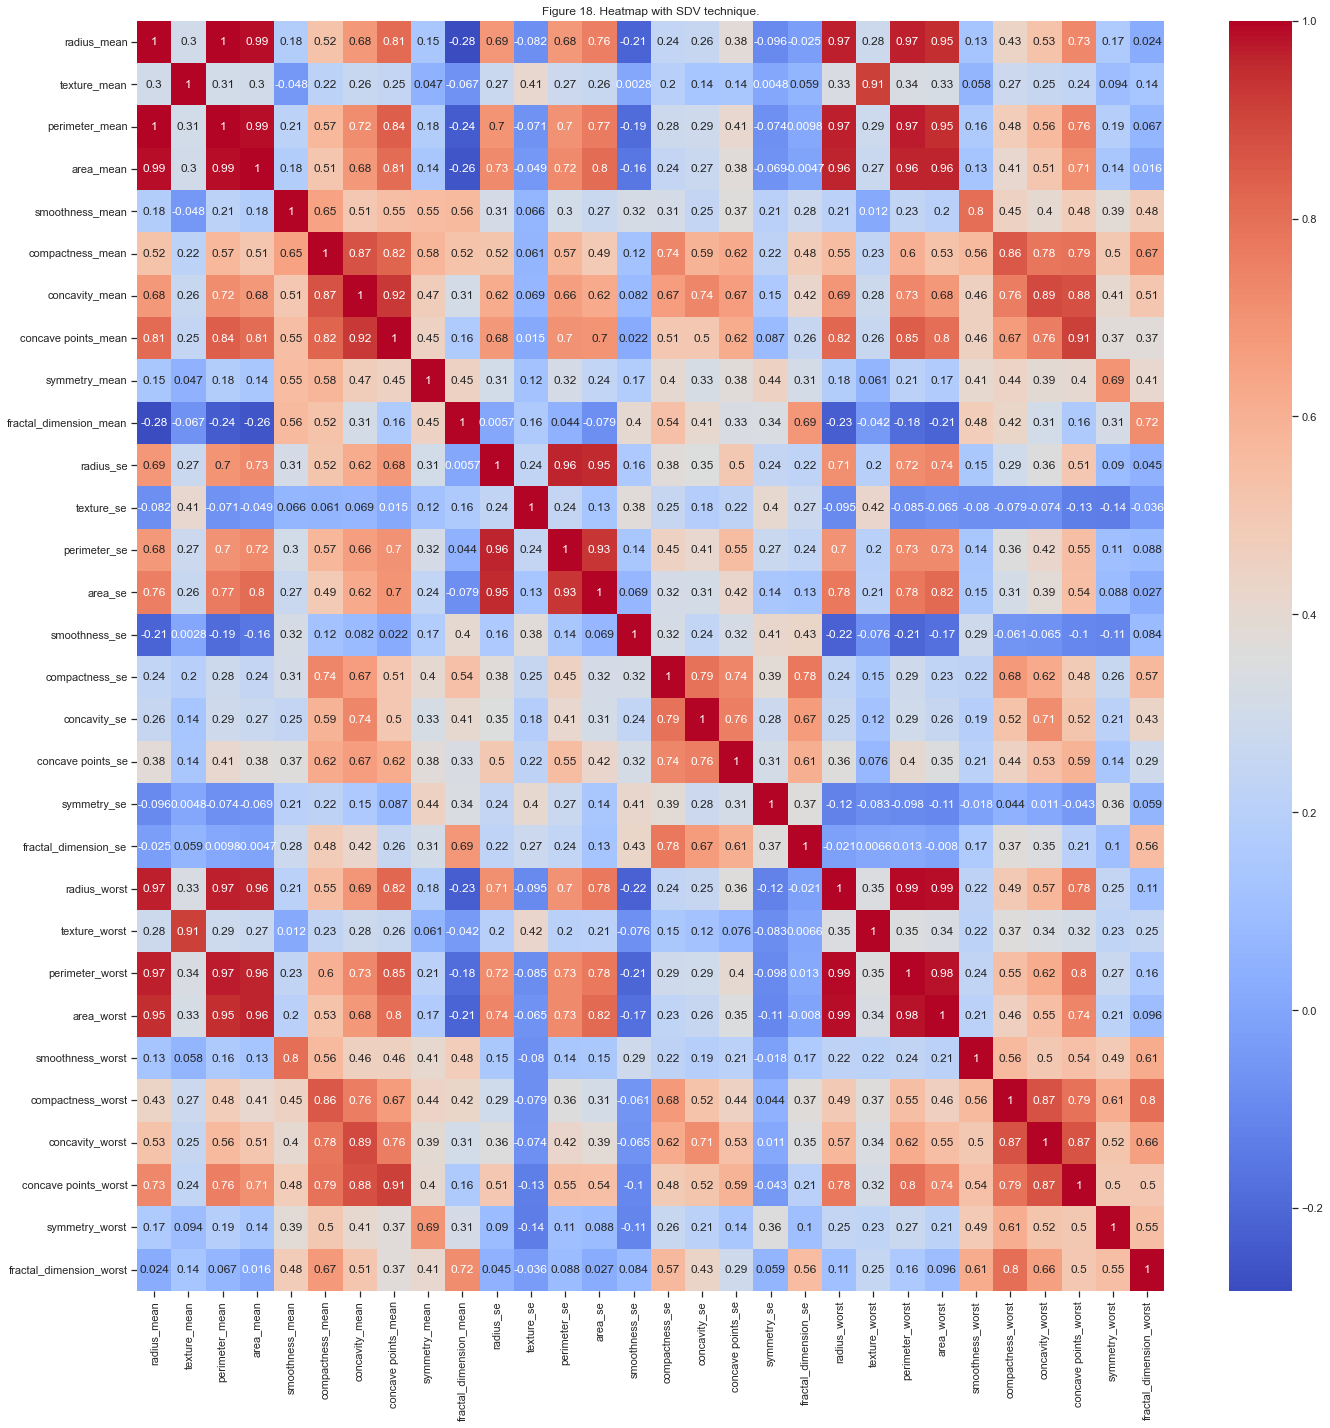

In [219]:
# Let s check if the correlation is still the same. 
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.heatmap(new_dt.corr(),annot=True,cmap='coolwarm').set(title="Figure 18. Heatmap with SDV technique.")
plt.tight_layout()

**SDV - RANDOM FOREST**

In [221]:
# Train test split

xsv = new_dt.drop(['diagnosis'], axis = 1)
ysv = new_dt['diagnosis']

xsv_train, xsv_test, ysv_train, ysv_test = train_test_split(xsv, ysv, test_size = 0.33, random_state = 10)

In [222]:
forest = RandomForestClassifier()
forest.fit(xsm_train, ysm_train)
ysv_pred_test = forest.predict(xsv_test)

# Random forest accuracy

rf_acc_sv = round((accuracy_score(ysv_test, ysv_pred_test))*100,2)
print("Random forest accuracy:", rf_acc_sv)
print()

# Random forest precision

rf_prec_sv = np.round((precision_score(ysv_test, ysv_pred_test, average=None))*100,2)
print("Random forest precision:", rf_prec_sv)
print()

# Random forest recall

rf_rec_sv = np.round((recall_score(ysv_test, ysv_pred_test, average=None))*100,2)
print("Random forest recall:", rf_rec_sv)
print()

# Random forest f1

rf_f1_sv = np.round((f1_score(ysv_test, ysv_pred_test, average=None))*100,2)
print("Random forest f1:", rf_f1_sv)
print()

# Random forest - Matthews correlation coefficient (MCC)

rf_mcc_sv = np.round((round(matthews_corrcoef(ysv_test, ysv_pred_test),2))*100,2)
print("Random forest MCC:", rf_mcc_sv)

Random forest accuracy: 96.19

Random forest precision: [93.22 99.15]

Random forest recall: [99.1 93.6]

Random forest f1: [96.07 96.3 ]

Random forest MCC: 93.0


Figure 18. SDV - RF Confusion Matrix


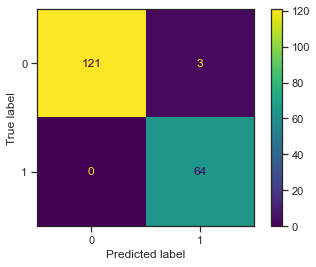

In [223]:
# Random forest - Confusion Matrix visualization.
print("Figure 18. SDV - RF Confusion Matrix")
rf_cm_sv = confusion_matrix(ysv_test, ysv_pred_test, labels=forest.classes_)
rfdisp_sv = ConfusionMatrixDisplay(confusion_matrix=rf_cm_sv, display_labels=forest.classes_)
rfdisp.plot()
plt.grid(False)
plt.show()

The model correctly predicted 121 benign samples but incorrectly predicted 3 as malignant.

The model correctly predicted 64 malignant observations but it did not incorrectly predicted samples as benign.

Exactly the same performance as the original dataset, the undersampling and smote technique.

## 8.4 RESAMPLING TECHNIQUES COMPARISON 

In this section we are going to compare the different results of the resampling techniques against the original dataset for the random forest classifier. 

**Accuracy comparison**

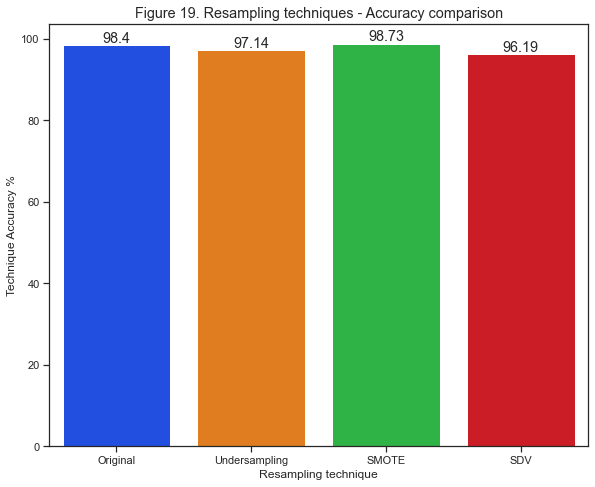

In [228]:
acc_data_res = {"Resampling technique":["Original","Undersampling","SMOTE","SDV"],
        "Technique Accuracy %":[rf_acc, rf_acc_un, rf_acc_sm, rf_acc_sv]
       }
    
accuracydf_res = pd.DataFrame(data=acc_data_res)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8.5, 7))

sns.set(font_scale=1.2)

sns.barplot(data=accuracydf_res, x="Resampling technique",y="Technique Accuracy %", palette ="bright").set(title="Figure 19. Resampling techniques - Accuracy comparison")

ax.bar_label(ax.containers[0])

plt.tight_layout()

**Matthews correlation coefficient comparison**

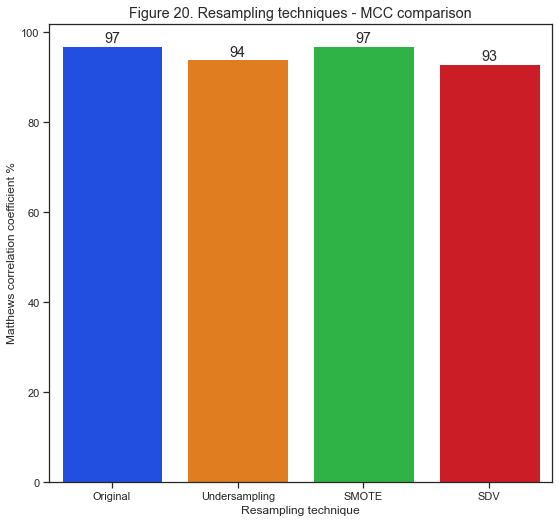

In [232]:
mcc_data_res = {"Resampling technique":["Original","Undersampling","SMOTE","SDV"],
            "Matthews correlation coefficient %":[rf_mcc,rf_mcc_un, rf_mcc_sm, rf_mcc_sv]
       }
    
mccdf_res = pd.DataFrame(data=mcc_data_res)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8, 7.5))

sns.set(font_scale=1.2)

sns.barplot(data=mccdf_res, x="Resampling technique",y="Matthews correlation coefficient %",palette ="bright").set(title="Figure 20. Resampling techniques - MCC comparison")

ax.bar_label(ax.containers[0])

plt.tight_layout()

**Precision comparison**

In [279]:
prec_comp_res = [rf_prec,rf_prec_un, rf_prec_sm, rf_prec_sv ]

pzero_res = []
pone_res = []

for i in prec_comp_res:
    p0r = i.item(0)
    p1r = i.item(1)
    pzero_res.append(p0r)
    pone_res.append(p1r)
    
a_res = np.array(pzero_res)
b_res = np.array(pone_res)

preczero_data_res = {"Resampling technique":["Original","Undersampling","SMOTE","SDV"],
            "Resampling Precision B %":a_res,
            "Resampling Precision M %":b_res
       }

preczero_data_res_df = pd.DataFrame(data=preczero_data_res)

preczero_data_res_df

,Resampling technique,Resampling Precision B %,Resampling Precision M %
0,Original,100.00,95.52
1,Undersampling,98.59,95.65
2,SMOTE,100.00,97.52
3,SDV,93.22,99.15


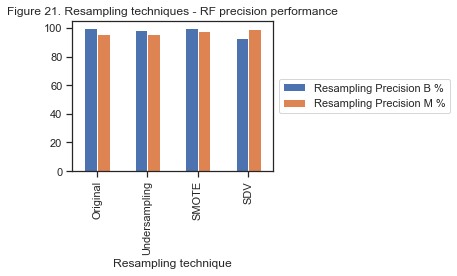

In [277]:
# plotting graph
sns.set(style="ticks")

preczero_data_res_df.plot(x="Resampling technique", y=["Resampling Precision B %", "Resampling Precision M %"], kind="bar")
plt.title("Figure 21. Resampling techniques - RF precision performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**Recall comparison**

In [282]:
recall_comp_res = [rf_rec, rf_rec_un, rf_rec_sm, rf_rec_sv]

reczero_res = []
recone_res = []

for i in recall_comp_res:
    r0r = i.item(0)
    r1r = i.item(1)
    reczero_res.append(r0r)
    recone_res.append(r1r)

c_res = np.array(reczero_res)
d_res = np.array(recone_res)

recall_data_res = {"Resampling technique":["Original","Undersampling","SMOTE","SDV"],
            "Resampling Recall B %":c_res,
            "Resampling Recall M %":d_res,
       }

recalldf_res = round(pd.DataFrame(data=recall_data_res),2)
recalldf_res

,Resampling technique,Resampling Recall B %,Resampling Recall M %
0,Original,97.58,100.00
1,Undersampling,95.89,98.51
2,SMOTE,97.46,100.00
3,SDV,99.10,93.60


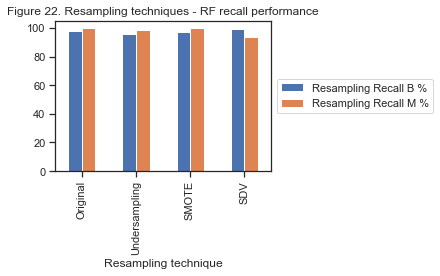

In [286]:
# plotting graph
sns.set(style="ticks")
recalldf_res.plot(x="Resampling technique", y=["Resampling Recall B %", "Resampling Recall M %"], kind="bar")
plt.title("Figure 22. Resampling techniques - RF recall performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**f1 comparison**

In [287]:
f1_comp_res = [rf_f1, rf_f1_un , rf_f1_sm, rf_f1_sv]

fzero_res = []
fone_res = []

for i in f1_comp_res:
    f0r = i.item(0)
    f1r = i.item(1)
    fzero_res.append(f0r)
    fone_res.append(f1r)

e = np.array(fzero_res)
f = np.array(fone_res)

f1_data_res = {"Resampling technique":["Original","Undersampling","SMOTE","SDV"],
            "Resampling f1 B %":e,
            "Resampling f1 M %":f
       }

f1df_res = np.round(pd.DataFrame(data=f1_data_res),2)
f1df_res

,Resampling technique,Resampling f1 B %,Resampling f1 M %
0,Original,98.78,97.71
1,Undersampling,97.22,97.06
2,SMOTE,98.71,98.74
3,SDV,96.07,96.30


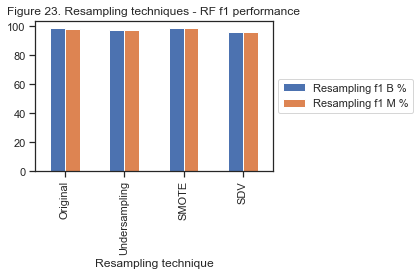

In [288]:
# plotting graph
sns.set(style="ticks")
f1df_res.plot(x="Resampling technique", y=["Resampling f1 B %", "Resampling f1 M %"], kind="bar")
plt.title("Figure 23. Resampling techniques - RF f1 performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**Comparison conclusion**

Overall, SMOTE gets the closest performance to the original dataset in almost all metrics. Therefore, It would be the best resampling technique for our dataset. 

# 9. DISCUSSION
***

The Wisconsin breast cancer dataset has been widely used in machine learning.(49-53) In this project, we have evaluated the dataset statistic, the different classifiers used with more frequency and how to resample the dataset through different techniques. 

The results have shown that the random forest classifier has the best performance over the other classifiers. These results match the ones observed in other studies, where the accuracy of the model is very similar across studies (49,50,53, 54). Therefore, it should be the best classifier in order to study the Wisconsin breast cancer dataset. 

However, other studies have focused on other classifiers like SVM, LR, KNN, neural networks and ensemble classifier. Obtaining similar results in the metrics to the ones seen in this project (52, 53). 

Interestingly, the random forest classifier manages to achieve a high level of performance in all metrics despite the imbalance, which it seems not affect the final outcome.(50,54) In order to improve this performance, different techniques of resampling were tested (undersampling, oversampling, and synthetic data generation) to balance the dataset. 

The resampling results showed that the synthetic data generation technique “SMOTE” achieved the best performance over the undersampling and oversampling techniques. Even matching some of the metrics from the original dataset. 


SMOTE technique has been previously used to balance the dataset, and also, to expand it.  Proving that a better classification effect could be got when the proposed classifier along with the SMOTE algorithm. (55,56) 

In conclusion, random forest and SMOTE are probably the best algorithms to expand and classify the WBCD. Future steps in this project would be to compare SMOTE against other techniques to generate synthetic data like SDV, Torch or ADASYN.

# 10. REFERENCES
***

1.	https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)  
2.	Breast Cancer Wisconsin Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download  
3.	https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html  
4.	https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html  
5.	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html  
6.	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html  
7.	https://www.w3schools.com/python/pandas/ref_df_info.asp  
8.	https://datatofish.com/replace-values-pandas-dataframe/  
9.	https://numpy.org/doc/stable/reference/generated/numpy.unique.html  
10.	https://stackoverflow.com/questions/15891038/change-column-type-in-pandas  
11.	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html  
12.	https://seaborn.pydata.org/generated/seaborn.heatmap.html  
13.	https://pythonbasics.org/seaborn-heatmap/  
14.	https://www.geeksforgeeks.org/python-pandas-dataframe-corr/  
15.	https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18  
16.	https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data  
17.	https://www.sharpsightlabs.com/blog/scikit-train_test_split/  
18.	https://dergipark.org.tr/tr/download/article-file/615107  
19.	https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7351679/pdf/978-981-15-7205-0_Chapter_10.pdf  
20.	https://ziyuan-shen.github.io/files/breast_cancer_prediction_report.pdf  
21.	https://www.mdpi.com/1660-4601/19/6/3211  
22.	https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf  
23.	https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa  
24.	https://towardsdatascience.com/k-nearest-neighbors-94395f445221  
25.	https://seaborn.pydata.org/generated/seaborn.set_style.html  
26.	https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html  
27.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
28.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html  
29.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  
30.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
31.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html  
32.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  
33.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html  
34.	https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a  
35.	https://towardsdatascience.com/a-practical-introduction-to-support-vector-machines-from-scikit-learn-6e678cf1f228  
36.	https://scikit-learn.org/stable/modules/svm.html  
37.	https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f  
38.	https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56  
39.	https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn  
40.	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html  
41.	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html  
42.	https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/  
43.	https://imbalanced-learn.org/stable/over_sampling.html  
44.	https://realpython.com/generative-adversarial-networks/  
45.	https://realpython.com/generative-adversarial-networks/  
46.	https://towardsdatascience.com/top-3-python-packages-to-generate-synthetic-data-33a351a5de0c  
47.	https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html  
48.	https://docs.sdv.dev/sdmetrics/metrics/metrics-glossary/kscomplement  
49. https://www.scirp.org/pdf/OALibJ_2016031015403611.pdf  
50. https://rstudio-pubs-static.s3.amazonaws.com/344010_1f4d6691092d4544bfbddb092e7223d2.html  
51. https://arxiv.org/abs/1711.07831 
52. https://ieeexplore.ieee.org/document/8324834
53. https://www.mdpi.com/1660-4601/19/6/3211  
54. https://www.kaggle.com/code/adrielnaranjo/breast-cancer-classification-with-random-forest  
55. https://www.nature.com/articles/s41598-021-03430-5  
56. https://c-t-a.me/T_CAI_Breast_Cancer.pdf  